In [82]:
from platform import python_version
import pandas as pd
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
import warnings
warnings.simplefilter("ignore")
from sklearn.svm import SVR
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [30]:
df = pd.read_csv('S5296.csv')
df

,PDB Id,Mutated Chain,Mutation_PDB,Label,UniProt,Mutation_UNP,DDGexp,Location,DCS,DOMH,PSSM,P_L,P_RKDE,P_FWY,N_Hydro,N_Charg,SASA_pro,SASA_sol,PremPS,similar proteins
0,1A43,A,C218S,forward,P12497,C350S,3.70,COR,-7.158,-0.72,-1,0.069444,0.000000,0.069444,4,2,20,146.1,1.487019,1A43A
1,1A43,A,C218S,reverse,P12497,S350C,-3.70,COR,7.156,0.72,8,0.069444,0.000000,0.069444,3,2,12,129.8,-1.739746,1A43A
2,1A43,A,E159D,forward,P12497,E291D,4.55,SUR,-2.631,-0.09,2,0.069444,0.000000,0.069444,8,9,43,186.2,0.766227,1A43A
3,1A43,A,E159D,reverse,P12497,D291E,-4.55,SUR,2.630,0.09,4,0.069444,0.000000,0.069444,8,9,74,158.7,-0.723130,1A43A
4,1A43,A,G156A,forward,P12497,G288A,2.40,COR,-5.275,0.27,0,0.069444,0.000000,0.069444,6,8,17,88.1,1.187639,1A43A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5291,5PTI,A,Y35F,reverse,P00974,F70Y,-0.60,COR,3.864,-0.25,10,0.000000,0.017241,0.103448,7,5,10,222.8,-1.909816,8PTIA;1BPIA;1BTIA;1BPTA;5PTIA;1NAGA;1FANA
5292,5PTI,A,Y35G,forward,P00974,Y70G,5.00,COR,-9.586,-2.34,-9,0.000000,0.034483,0.103448,7,5,13,236.8,3.698962,8PTIA;1BPIA;1BTIA;1BPTA;5PTIA;1NAGA;1FANA
5293,5PTI,A,Y35G,reverse,P00974,G70Y,-5.00,COR,9.586,2.34,10,0.000000,0.000000,0.086207,6,5,5,88.1,-3.421731,8PTIA;1BPIA;1BTIA;1BPTA;5PTIA;1NAGA;1FANA
5294,5PTI,A,Y35N,forward,P00974,Y70N,3.70,COR,-8.558,-2.59,-8,0.000000,0.034483,0.103448,7,5,13,236.8,4.263901,8PTIA;1BPIA;1BTIA;1BPTA;5PTIA;1NAGA;1FANA


In [31]:
descriptive_features = df[["DDGexp","DCS", "DOMH", "PSSM", "P_L", "P_RKDE", "P_FWY", "N_Hydro", "N_Charg", "SASA_pro", "SASA_sol"]]
descriptive_features.head(15)

,DDGexp,DCS,DOMH,PSSM,P_L,P_RKDE,P_FWY,N_Hydro,N_Charg,SASA_pro,SASA_sol
0,3.70,-7.158,-0.72,-1,0.069444,0.000000,0.069444,4,2,20,146.1
1,-3.70,7.156,0.72,8,0.069444,0.000000,0.069444,3,2,12,129.8
2,4.55,-2.631,-0.09,2,0.069444,0.000000,0.069444,8,9,43,186.2
3,-4.55,2.630,0.09,4,0.069444,0.000000,0.069444,8,9,74,158.7
4,2.40,-5.275,0.27,0,0.069444,0.000000,0.069444,6,8,17,88.1
5,-2.40,5.274,-0.27,5,0.069444,0.006944,0.069444,6,8,37,118.1
6,4.55,-5.572,0.19,-1,0.069444,0.000000,0.069444,6,9,87,256.0
7,-4.55,5.571,-0.19,5,0.069444,0.000000,0.069444,6,8,37,118.1
8,0.70,-11.710,-0.90,-3,0.069444,0.000000,0.069444,6,5,26,266.3
9,-0.70,11.710,0.90,10,0.069444,0.000000,0.062500,5,5,16,118.1


In [32]:
target_feature = df[['PremPS']]
target_feature

,PremPS
0,1.487019
1,-1.739746
2,0.766227
3,-0.723130
4,1.187639
...,...
5291,-1.909816
5292,3.698962
5293,-3.421731
5294,4.263901


In [33]:
descriptive_features.isnull().sum()

DDGexp      0
DCS         0
DOMH        0
PSSM        0
P_L         0
P_RKDE      0
P_FWY       0
N_Hydro     0
N_Charg     0
SASA_pro    0
SASA_sol    0
dtype: int64

In [34]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(descriptive_features, target_feature, test_size = 0.2,random_state = 42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((4236, 11), (4236, 1), (1060, 11), (1060, 1))

## Cross validation within S5296

### Random Forest

In [35]:

regressor_RF_cv = RandomForestRegressor(n_estimators=500,criterion='squared_error', 
                                    max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                                    min_weight_fraction_leaf=0.0, max_features=1.0)

regressor_RF_cv.fit(X_train,y_train) 
predicted_values_RF_cv = regressor_RF_cv.predict(X_test)

### SVM

In [36]:
svc_cv = SVR(kernel="rbf", C=100)
svc_cv.fit(X_train,y_train) 
predicted_values_svr_cv = svc_cv.predict(X_test) 

### XG Boost GradientBoosting Regressor 

In [37]:
xgb_cv = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
xgb_cv.fit(X_train,y_train) 
predicted_values_xgb_cv = xgb_cv.predict(X_test)  


In [83]:
regressor_linear_cv = LinearRegression()
regressor_linear_cv.fit(X_train,y_train)
predicted_values_regressor_linear_cv = regressor_linear_cv.predict(X_test)


In [85]:
y_test_evaluate = y_test

In [86]:
y_test_evaluate['Predicted PremPS Random Forest'] = predicted_values_RF_cv
y_test_evaluate['Predicted PremPS SVM'] = predicted_values_svr_cv
y_test_evaluate['Predicted PremPS XG Boost']=predicted_values_xgb_cv
y_test_evaluate['Predicted PremPS Linear Regression']=predicted_values_regressor_linear_cv

### Random Forrest Regressor

In [87]:
import math
mse_cv_rf = mean_squared_error(y_test.PremPS, predicted_values_RF_cv)
rmse_cv_rf = math.sqrt(mse_cv_rf)
rmse_cv_rf

0.34718358507467817

### Support vector machine

In [41]:
mse_cv_svr = mean_squared_error(y_test.PremPS, predicted_values_svr_cv)
rmse_cv_svr = math.sqrt(mse_cv_svr)
rmse_cv_svr

0.5003010544443497

### XG Boost

In [42]:
mse_cv_xgb = mean_squared_error(y_test.PremPS, predicted_values_xgb_cv)
rmse_cv_xgb = math.sqrt(mse_cv_xgb)
rmse_cv_xgb

0.510217664476589

## Linear Regression

In [88]:
mse_cv_lr = mean_squared_error(y_test.PremPS, predicted_values_regressor_linear_cv)
rmse_cv_lr = math.sqrt(mse_cv_lr)
rmse_cv_lr

0.5647226140763008

In [89]:
y_test

,PremPS,Predicted PremPS Random Forest,Predicted PremPS SVM,Predicted PremPS XG Boost,Predicted PremPS Linear Regression
422,1.213587,0.596448,0.389490,0.579619,0.618454
1101,-1.277986,-1.298867,-0.938919,-1.138107,-0.847890
810,-1.245039,-1.168726,0.321339,-0.214653,-0.220280
4262,3.028420,2.449705,2.115906,2.099073,1.836890
5183,-0.551465,-0.621657,-0.321340,-0.971531,-0.660370
...,...,...,...,...,...
4573,-0.297443,-0.701070,-0.424117,-0.896811,-0.841160
2277,-1.199636,-1.160056,-1.672402,-1.257956,-1.715835
3226,3.446787,3.508123,3.238755,3.058384,2.899899
602,1.304361,1.043286,0.932284,1.395049,0.883680


## Correlation Matrix

In [90]:
corr = y_test.corr(method='pearson', min_periods=1)
R_value_RF=corr.values[0][1]
R_value_svr = corr.values[0][2]
R_value_xgb = corr.values[0][3]
R_value_lr = corr.values[0][4]


In [91]:
R_value_RF,R_value_svr,R_value_xgb,R_value_lr

(0.9670193698194706,
 0.9295581626891354,
 0.9265714587941043,
 0.9093287350768005)

### Correlation Matrix

<AxesSubplot:>

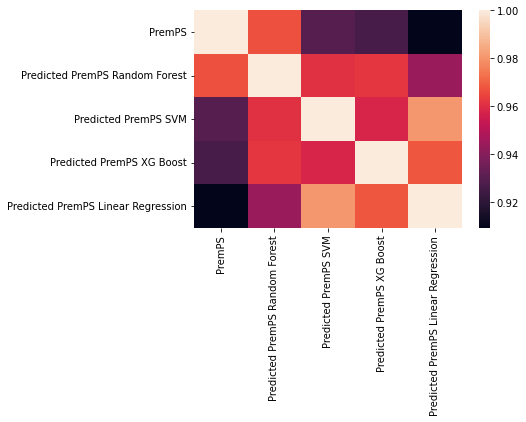

In [92]:
import seaborn as sns
sns.heatmap(corr)

In [46]:
df.head()

,PDB Id,Mutated Chain,Mutation_PDB,Label,UniProt,Mutation_UNP,DDGexp,Location,DCS,DOMH,PSSM,P_L,P_RKDE,P_FWY,N_Hydro,N_Charg,SASA_pro,SASA_sol,PremPS,similar proteins
0,1A43,A,C218S,forward,P12497,C350S,3.70,COR,-7.158,-0.72,-1,0.069444,0.0,0.069444,4,2,20,146.1,1.487019,1A43A
1,1A43,A,C218S,reverse,P12497,S350C,-3.70,COR,7.156,0.72,8,0.069444,0.0,0.069444,3,2,12,129.8,-1.739746,1A43A
2,1A43,A,E159D,forward,P12497,E291D,4.55,SUR,-2.631,-0.09,2,0.069444,0.0,0.069444,8,9,43,186.2,0.766227,1A43A
3,1A43,A,E159D,reverse,P12497,D291E,-4.55,SUR,2.630,0.09,4,0.069444,0.0,0.069444,8,9,74,158.7,-0.723130,1A43A
4,1A43,A,G156A,forward,P12497,G288A,2.40,COR,-5.275,0.27,0,0.069444,0.0,0.069444,6,8,17,88.1,1.187639,1A43A


In [47]:
regressor_RF_cv.feature_importances_

array([0.21331974, 0.58074093, 0.10408166, 0.01166358, 0.01140162,
       0.0092881 , 0.00923711, 0.00451051, 0.0042736 , 0.04585919,
       0.00562395])

<AxesSubplot:>

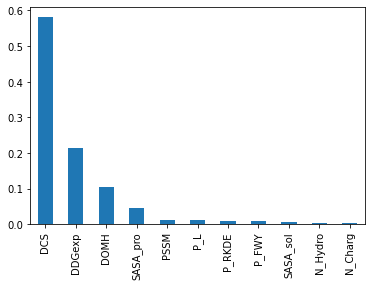

In [53]:
feat_importances = pd.Series(regressor_RF_cv.feature_importances_, index=descriptive_features.columns)
feat_importances.nlargest(20).plot(kind='bar')

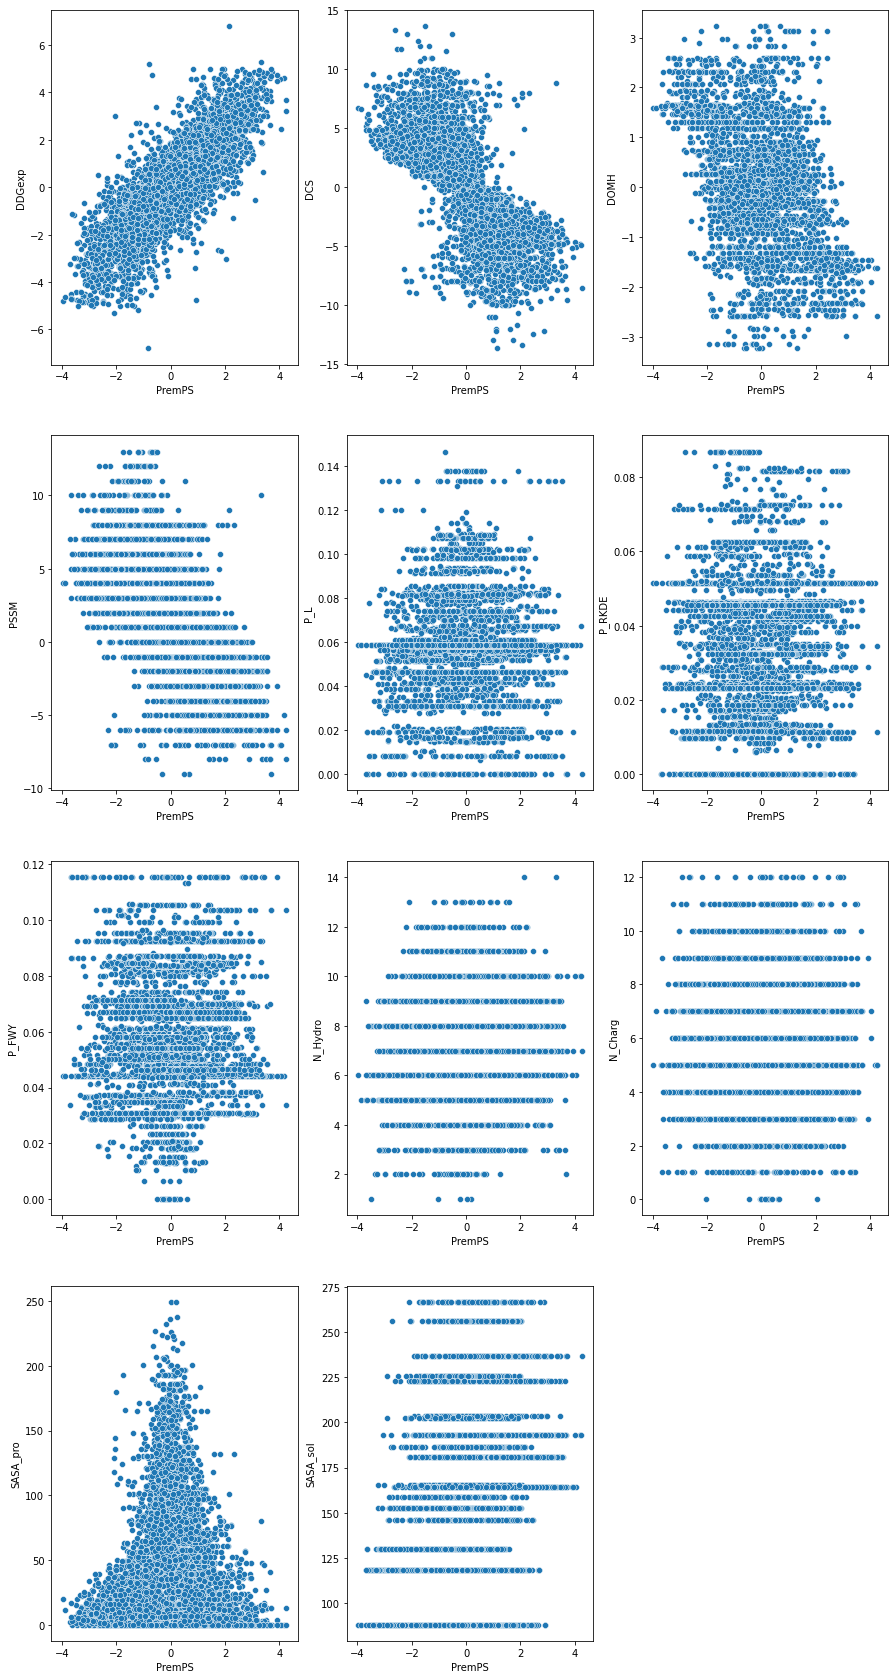

In [80]:
count=1
plt.subplots(figsize=(15, 30))
for i in descriptive_features.columns:
    plt.subplot(4,3,count)
    sns.scatterplot(df["PremPS"],descriptive_features[i])
    count+=1

plt.show()

# Analyzing by removing the most important feature i.e. DCS

## Observations:
- RMSE Increased
- Correalation Decreased 

In [93]:
descriptive_features = df[["DDGexp", "DOMH", "PSSM", "P_L", "P_RKDE", "P_FWY", "N_Hydro", "N_Charg", "SASA_pro", "SASA_sol"]]
descriptive_features.head(15)

,DDGexp,DOMH,PSSM,P_L,P_RKDE,P_FWY,N_Hydro,N_Charg,SASA_pro,SASA_sol
0,3.70,-0.72,-1,0.069444,0.000000,0.069444,4,2,20,146.1
1,-3.70,0.72,8,0.069444,0.000000,0.069444,3,2,12,129.8
2,4.55,-0.09,2,0.069444,0.000000,0.069444,8,9,43,186.2
3,-4.55,0.09,4,0.069444,0.000000,0.069444,8,9,74,158.7
4,2.40,0.27,0,0.069444,0.000000,0.069444,6,8,17,88.1
5,-2.40,-0.27,5,0.069444,0.006944,0.069444,6,8,37,118.1
6,4.55,0.19,-1,0.069444,0.000000,0.069444,6,9,87,256.0
7,-4.55,-0.19,5,0.069444,0.000000,0.069444,6,8,37,118.1
8,0.70,-0.90,-3,0.069444,0.000000,0.069444,6,5,26,266.3
9,-0.70,0.90,10,0.069444,0.000000,0.062500,5,5,16,118.1


In [94]:
target_feature = df[['PremPS']]
target_feature

,PremPS
0,1.487019
1,-1.739746
2,0.766227
3,-0.723130
4,1.187639
...,...
5291,-1.909816
5292,3.698962
5293,-3.421731
5294,4.263901


In [95]:
descriptive_features.isnull().sum()

DDGexp      0
DOMH        0
PSSM        0
P_L         0
P_RKDE      0
P_FWY       0
N_Hydro     0
N_Charg     0
SASA_pro    0
SASA_sol    0
dtype: int64

In [96]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(descriptive_features, target_feature, test_size = 0.2,random_state = 42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((4236, 10), (4236, 1), (1060, 10), (1060, 1))

## Cross validation within S5296

### Random Forest

In [97]:

regressor_RF_cv = RandomForestRegressor(n_estimators=500,criterion='squared_error', 
                                    max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                                    min_weight_fraction_leaf=0.0, max_features=1.0)

regressor_RF_cv.fit(X_train,y_train) 
predicted_values_RF_cv = regressor_RF_cv.predict(X_test)

### SVM

In [98]:
svc_cv = SVR(kernel="rbf", C=100)
svc_cv.fit(X_train,y_train) 
predicted_values_svr_cv = svc_cv.predict(X_test) 

### XG Boost GradientBoosting Regressor 

In [99]:
xgb_cv = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
xgb_cv.fit(X_train,y_train) 
predicted_values_xgb_cv = xgb_cv.predict(X_test)  


In [100]:
regressor_linear_cv = LinearRegression()
regressor_linear_cv.fit(X_train,y_train)
predicted_values_regressor_linear_cv = regressor_linear_cv.predict(X_test)


In [101]:
y_test_evaluate = y_test

In [102]:
y_test_evaluate['Predicted PremPS Random Forest'] = predicted_values_RF_cv
y_test_evaluate['Predicted PremPS SVM'] = predicted_values_svr_cv
y_test_evaluate['Predicted PremPS XG Boost']=predicted_values_xgb_cv
y_test_evaluate['Predicted PremPS Linear Regression']=predicted_values_regressor_linear_cv

### Random Forrest Regressor

In [103]:
import math
mse_cv_rf = mean_squared_error(y_test.PremPS, predicted_values_RF_cv)
rmse_cv_rf = math.sqrt(mse_cv_rf)
rmse_cv_rf

0.49304727183603436

### Support vector machine

In [104]:
mse_cv_svr = mean_squared_error(y_test.PremPS, predicted_values_svr_cv)
rmse_cv_svr = math.sqrt(mse_cv_svr)
rmse_cv_svr

0.5798163786217321

### XG Boost

In [105]:
mse_cv_xgb = mean_squared_error(y_test.PremPS, predicted_values_xgb_cv)
rmse_cv_xgb = math.sqrt(mse_cv_xgb)
rmse_cv_xgb

0.5853100407388989

## Linear Regression

In [106]:
mse_cv_lr = mean_squared_error(y_test.PremPS, predicted_values_regressor_linear_cv)
rmse_cv_lr = math.sqrt(mse_cv_lr)
rmse_cv_lr

0.6264015615597389

In [107]:
y_test

,PremPS,Predicted PremPS Random Forest,Predicted PremPS SVM,Predicted PremPS XG Boost,Predicted PremPS Linear Regression
422,1.213587,0.630915,0.416961,0.611876,0.656207
1101,-1.277986,-1.055916,-0.791620,-1.196449,-0.765163
810,-1.245039,-1.059646,-0.404991,-0.414632,-0.580009
4262,3.028420,2.776138,2.391107,2.420978,2.092062
5183,-0.551465,-0.340788,-0.154710,-0.828304,-0.449967
...,...,...,...,...,...
4573,-0.297443,-0.619505,-0.461847,-1.166455,-0.930918
2277,-1.199636,-1.011918,-1.720986,-1.305607,-1.788949
3226,3.446787,3.286527,3.390656,2.747306,3.061160
602,1.304361,1.054384,1.254919,1.310867,1.286514


## Correlation Matrix

In [108]:
corr = y_test.corr(method='pearson', min_periods=1)
R_value_RF=corr.values[0][1]
R_value_svr = corr.values[0][2]
R_value_xgb = corr.values[0][3]
R_value_lr = corr.values[0][4]


In [109]:
R_value_RF,R_value_svr,R_value_xgb,R_value_lr

(0.9319514884697407,
 0.9040980848683055,
 0.9021411860950658,
 0.8871058194547227)

### Correlation Matrix

<AxesSubplot:>

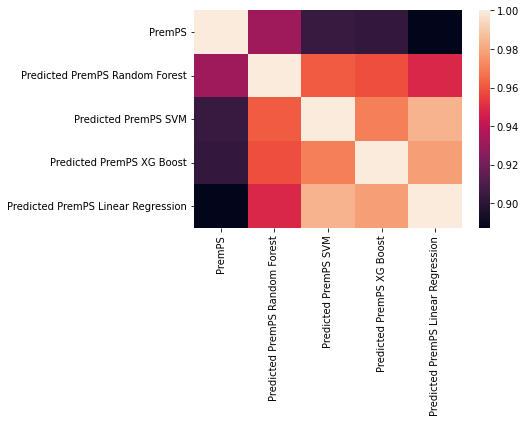

In [110]:
import seaborn as sns
sns.heatmap(corr)

In [111]:
df.head()

,PDB Id,Mutated Chain,Mutation_PDB,Label,UniProt,Mutation_UNP,DDGexp,Location,DCS,DOMH,PSSM,P_L,P_RKDE,P_FWY,N_Hydro,N_Charg,SASA_pro,SASA_sol,PremPS,similar proteins
0,1A43,A,C218S,forward,P12497,C350S,3.70,COR,-7.158,-0.72,-1,0.069444,0.0,0.069444,4,2,20,146.1,1.487019,1A43A
1,1A43,A,C218S,reverse,P12497,S350C,-3.70,COR,7.156,0.72,8,0.069444,0.0,0.069444,3,2,12,129.8,-1.739746,1A43A
2,1A43,A,E159D,forward,P12497,E291D,4.55,SUR,-2.631,-0.09,2,0.069444,0.0,0.069444,8,9,43,186.2,0.766227,1A43A
3,1A43,A,E159D,reverse,P12497,D291E,-4.55,SUR,2.630,0.09,4,0.069444,0.0,0.069444,8,9,74,158.7,-0.723130,1A43A
4,1A43,A,G156A,forward,P12497,G288A,2.40,COR,-5.275,0.27,0,0.069444,0.0,0.069444,6,8,17,88.1,1.187639,1A43A


In [112]:
regressor_RF_cv.feature_importances_

array([0.67334144, 0.09587048, 0.08829139, 0.0178525 , 0.01583686,
       0.01577274, 0.00893238, 0.00905162, 0.05232767, 0.02272291])

<AxesSubplot:>

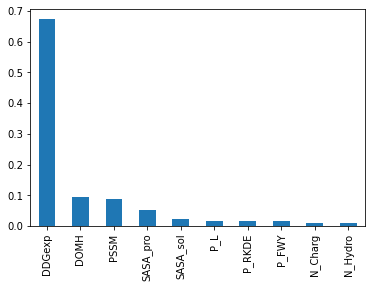

In [113]:
feat_importances = pd.Series(regressor_RF_cv.feature_importances_, index=descriptive_features.columns)
feat_importances.nlargest(20).plot(kind='bar')

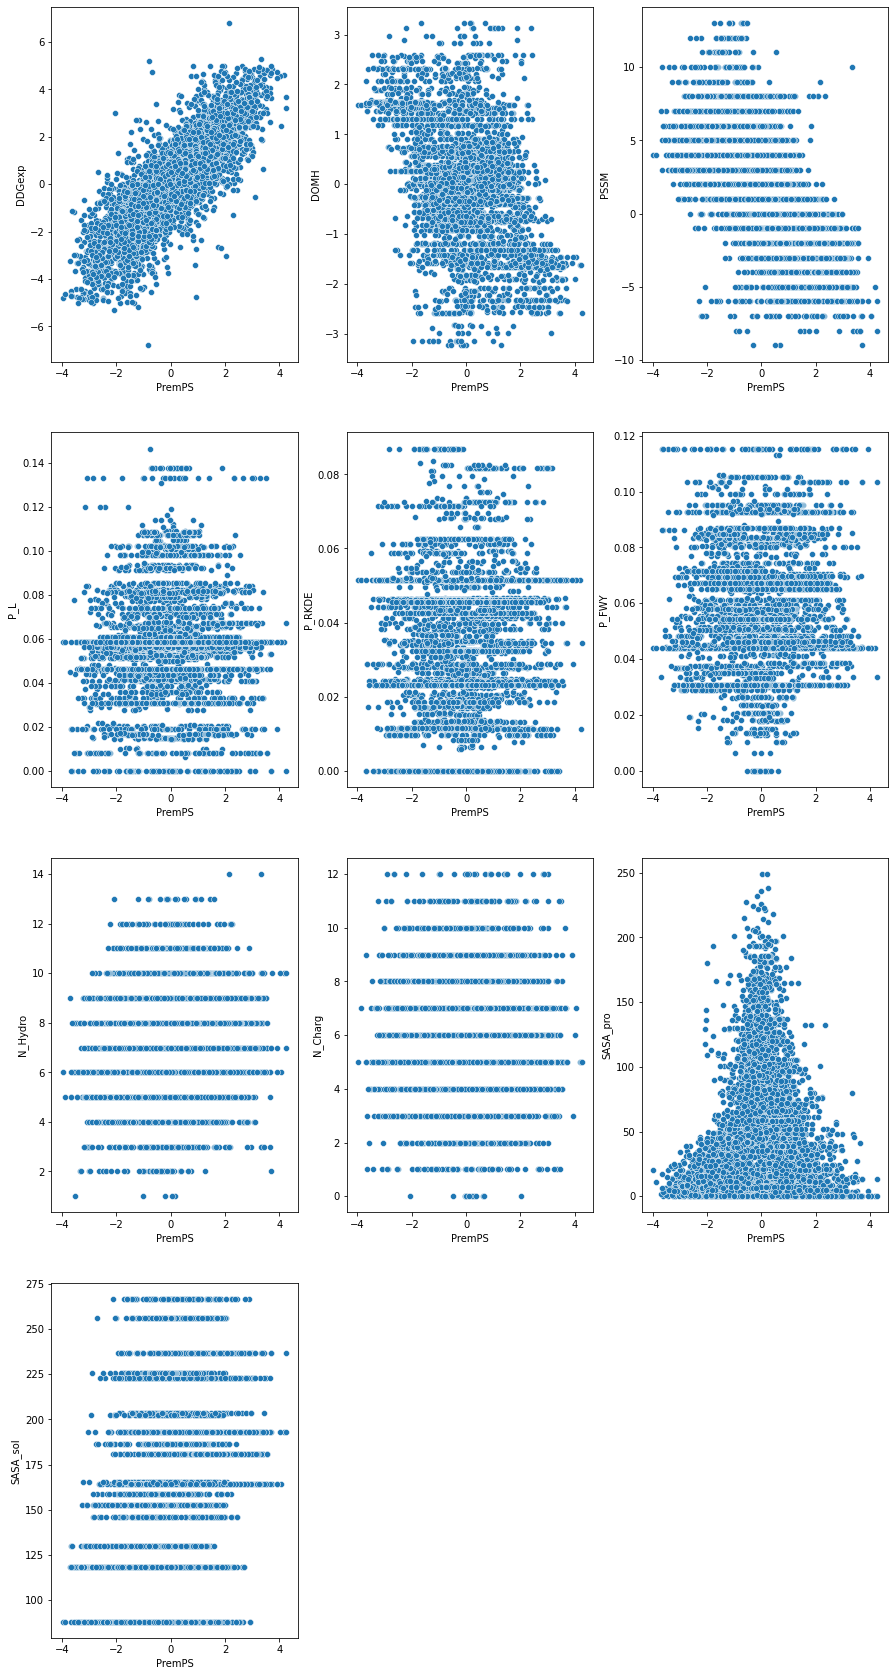

In [114]:
count=1
plt.subplots(figsize=(15, 30))
for i in descriptive_features.columns:
    plt.subplot(4,3,count)
    sns.scatterplot(df["PremPS"],descriptive_features[i])
    count+=1

plt.show()